<a href="https://colab.research.google.com/github/philjaycee/ML---CAP430/blob/main/Chest_x_ray_classification_with_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 
import shutil
import os
import zipfile
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
from keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/jctsfj2sfn-1.zip

--2021-06-08 10:56:41--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/jctsfj2sfn-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.112.96
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.112.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1437762638 (1.3G) [application/octet-stream]
Saving to: ‘jctsfj2sfn-1.zip.1’

jctsfj2sfn-1.zip.1    3%[                    ]  44.97M  13.2MB/s    eta 1m 46s 

In [ ]:
path_covid19 = f"jctsfj2sfn-1.zip"
local_zip = path_covid19
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
path_covid19 = f"covid19-pneumonia-normal-chest-xraypa-dataset.zip"
local_zip = path_covid19
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
splitfolders.ratio("/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/", output="/content/split2/", seed=1337, ratio=(0.90, 0.10))

In [ ]:
dir = 'train_fi'
base_dir = '/content/'
path = os.path.join(base_dir, dir)
if not os.path.exists(dir):
  try:
    os.mkdir(path)
  except:
    print('file is in')

In [ ]:
dir = 'test_fi'
base_dir = '/content/'
path = os.path.join(base_dir, dir)
if not os.path.exists(dir):
  try:
    os.mkdir(path)
  except:
    print('file is in')

In [ ]:
src = '/content/split2/train/'
dest = '/content/train_fi/'

src_files = os.listdir(src)
for path, subdirs, files in os.walk(src):
    for name in files:
        filename = os.path.join(path, name)
        shutil.copy2(filename, dest)

In [ ]:
src = '/content/split2/val/'
dest = '/content/test_fi/'

src_files = os.listdir(src)
for path, subdirs, files in os.walk(src):
    for name in files:
        filename = os.path.join(path, name)
        shutil.copy2(filename, dest)

In [ ]:
print(len(os.listdir('/content/test_fi/')))

In [ ]:
print(len(os.listdir('/content/train_fi/')))

4116


In [ ]:
dir = 'train'
base_dir = '/content/'
path = os.path.join(base_dir, dir)
if not os.path.exists(dir):
  try:
    os.mkdir(path)
  except:
    print('file is in')

In [ ]:
os.listdir(base_dir)

['.config',
 'train_fi',
 'covid19-pneumonia-normal-chest-xraypa-dataset.zip',
 'test_fi',
 'train',
 'split2',
 'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset',
 'metadata.csv',
 'jctsfj2sfn-1.zip',
 'sample_data']

In [ ]:
src = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/'
dest = '/content/train/'

src_files = os.listdir(src)
for path, subdirs, files in os.walk(src):
    for name in files:
        filename = os.path.join(path, name)
        shutil.copy2(filename, dest)

In [ ]:
directories = []
categories = []
    
files = os.listdir('/content/train_fi/')

for img in files:

    fileName = img.split('.')[0]
    
    if '0000'  in fileName: categories.append(0)
    elif  'COVID-19 '  in fileName: categories.append(1)
    elif  'COVID19' in fileName: categories.append(1)
    else: categories.append(2)


df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [ ]:
df.head(30)

,filename,category
0,person298_bacteria_1408.jpeg,2
1,00000834_001.png,0
2,00000974_002.png,0
3,person318_bacteria_1474.jpeg,2
4,00000771_000.png,0
5,COVID-19 (859).jpg,1
6,COVID-19 (702).jpg,1
7,00000976_002.png,0
8,person971_bacteria_2896.jpeg,2
9,00000850_000.png,0


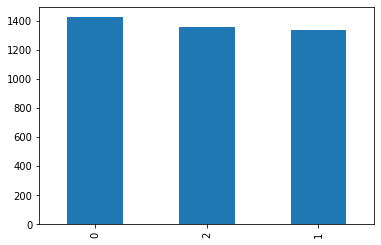

In [ ]:
'''
0 Represents Normal 
1 Represents COVID-19
2 Represents Viral Pneumonia 
'''
df['category'].value_counts().plot.bar()

COVID19(435).jpg


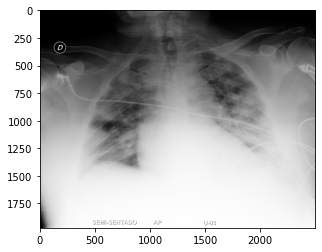

In [ ]:
sample = random.choice(os.listdir('/content/train_fi/'))
image = load_img('/content/train_fi/' + sample)

print(sample)
plt.imshow(image)

In [ ]:
model = tf.keras.models.Sequential([
      MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax'),
])

model.layers[0].trainable = False

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 2,915,395
Trainable params: 657,411
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch,logs={}):
          print(logs.get('accuracy'))
          if (logs.get('accuracy')>0.90) and (logs.get('val_accuracy')>0.90):
              print("Reached 90% accuracy so cancelling training!")
              self.model.stop_training=True

In [ ]:
callbacks = myCallback()

In [ ]:
df["category"] = df["category"].replace({0: 'Normal', 1: 'COVID-19', 2 : 'Pneumonia'}) 

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,filename,category
0,00000047_000.png,Normal
1,COVID-19 (21).jpeg,COVID-19
2,person262_virus_544.jpeg,Pneumonia
3,person940_virus_1602.jpeg,Pneumonia
4,COVID19(126).jpg,COVID-19
...,...,...
4111,00005032_000.png,Normal
4112,00000158_000.png,Normal
4113,00000823_004.png,Normal
4114,COVID-19 (379).jpg,COVID-19


In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

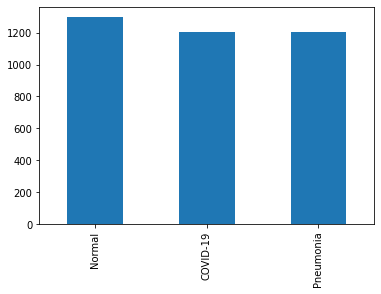

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 5

In [ ]:
IMAGE_SIZE = (224,224)

train_datagen = ImageDataGenerator (
    
    rotation_range = 15,
    rescale = 1./255,
    
    shear_range = 0.1,
    zoom_range = 0.2,
    
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe (
    
    train_df, 
    '/content/train_fi/', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 147
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe (
    
    validate_df, 
    '/content/train_fi/', 
    x_col ='filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe (
    
    example_df, 
    '/content/train/', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

In [ ]:
print(example_df)

plt.figure(figsize=(12, 12))

for i in range(0, 15):
    
    plt.subplot(5, 3, i+1)
    
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
epochs = 14

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs= 100, #nanti ganti epoch
    validation_data=validation_generator,
    validation_steps=5,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/100
10/10 - 65s - loss: 1.4870 - accuracy: 0.5414 - val_loss: 0.8450 - val_accuracy: 0.7200
0.5414201021194458
Epoch 2/100
10/10 - 57s - loss: 0.5048 - accuracy: 0.8269 - val_loss: 0.2772 - val_accuracy: 0.9200
0.8269230723381042
Epoch 3/100
10/10 - 62s - loss: 0.4406 - accuracy: 0.8565 - val_loss: 0.1930 - val_accuracy: 0.9200
0.8564625978469849
Epoch 4/100
10/10 - 63s - loss: 0.3807 - accuracy: 0.8782 - val_loss: 0.1424 - val_accuracy: 0.9600
0.8782312870025635
Epoch 5/100
10/10 - 57s - loss: 0.3856 - accuracy: 0.8706 - val_loss: 0.4053 - val_accuracy: 0.8800
0.8705621361732483
Epoch 6/100
10/10 - 63s - loss: 0.3830 - accuracy: 0.8619 - val_loss: 0.3399 - val_accuracy: 0.9200
0.8619047403335571
Epoch 7/100
10/10 - 61s - loss: 0.3494 - accuracy: 0.8830 - val_loss: 0.3844 - val_accuracy: 0.8800
0.882993221282959
Epoch 8/100
10/10 - 57s - loss: 0.3787 - accuracy: 0.8624 - val_loss: 0.2339 - val_accuracy: 0.9200
0.8624260425567627
Epoch 9/100
10/10 - 61s - loss: 0.3742 - accuracy

KeyboardInterrupt: ignored

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, accuracy, 'g', label='Training Accuracy')
plt.plot(numEpochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def get_config(self):
    config = super().get_config().copy()
    config.update({
        'return_sequences': self.return_sequences 
    })
    return config

model.save('/content/model_ml_mobile.h5')

In [ ]:
open('/content/pred_vg.tflite', 'wb').write(tfmodel)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('model_ml_vg_1.h5')

In [ ]:
directories = []
categories = []

test_filenames = os.listdir('/content/test_fi/')

for img in test_filenames:

    fileName = img.split('.')[0]
    
    if '000'  in fileName: categories.append(0)
    elif  'COVID-19 '  in fileName: categories.append(1)
    elif  'COVID19' in fileName: categories.append(1)
    else: categories.append(2)


test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})

nb_samples = test_df.shape[0]

In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    
    test_df, 
    '/content/train/', 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = (224,224),
    batch_size = 3,
    shuffle = False
)

In [ ]:
batch_size = 3

In [ ]:
predict = model.predict(test_generator, steps = np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({'Normal': 0, 'COVID-19': 1, 'Pneumonia' :2})

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(12)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    category = row['category']
    
    img = load_img( '/content/test_fi/' + filename, target_size=IMAGE_SIZE)
    
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' Pred: (' + "{}".format(category) + ')' )
    
plt.tight_layout()
plt.show()

In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img('/content/test_fi/' + filename, target_size=IMAGE_SIZE)
    
    if '000' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1

    if '80446' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'COVID-19 ' in filename:
        
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1

    if 'COVID19' in filename:
        
        if prediction == 1:
            correctPredictions += 1
            correctCovidPred += 1
        
        totalCovidPred += 1

    if 'F4341CE' in filename:
        
        if prediction ==2:
            correctPredictions += 1
            correctPneuPred += 1
        
        totalPneuPred += 1
    
    if 'person' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1
    

In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

In [ ]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if '000' in filename: actual.append(0)
    if 'COVID-19 ' in filename: actual.append(1)
    if '80446565-E090-4187-A031-9D3CEAA586C8' in filename: actual.append(0)
    if 'F4341CE7-73C9-45C6-99C8-8567A5484B63-1068x1020' in filename: actual.append(2)
    if 'COVID19' in filename: actual.append(1)
    if 'person' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [ ]:
print(classification_report(actual, pred))

In [ ]:
sns.heatmap(classification_report(actual, pred))

In [ ]:
# ROC AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from  sklearn.metrics import precision_recall_fscore_support

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
actuals = []
probabilities = []

In [ ]:
predicted_probabilities = model.predict_generator(test_generator,
                        steps=test_generator.samples/test_generator.batch_size)

In [ ]:
predicted_probabilities.shape

In [ ]:
predicted_probabilities
predicted_probabilities = tf.nn.softmax(predicted_probabilities)

In [ ]:
predicted_labels = tf.math.argmax(predicted_probabilities, axis=1).numpy()

In [ ]:
classes = ['normal', 'COVID-19', 'Pneumonia']

In [ ]:
class_dict ={classes[i]: i for i in range(3)}

In [ ]:
predicted_labels

In [ ]:
def test_class_probabilities(model,  which_class):
    actuals = []
    probabilities = []
    
    predicted_logits = model.predict_generator(test_generator,
                        steps=test_generator.samples/test_generator.batch_size)
    
    #fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predicted_labels)

    predicted_probabilities = tf.nn.softmax(predicted_logits)
    #print(predicted_probabilities)
    #predicted_labels = tf.math.argmax(predicted_probabilities, axis=1).numpy()
    
    actuals.extend(predicted_labels == which_class)
    #probabilities.extend(np.exp(predicted_probabilities[:, which_class]))
    probabilities.extend(predicted_probabilities[:, which_class].numpy())
    return [i for i in actuals], [i for i in probabilities]

In [ ]:
which_class = 0
actuals, class_probabilities = test_class_probabilities(model, which_class)
#print(actuals)
#print(class_probabilities)
fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for normal class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
which_class = 1
actuals, class_probabilities = test_class_probabilities(model, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for COVID-19 class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
which_class = 2
actuals, class_probabilities = test_class_probabilities(model, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for COVID-19 class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('model_ml_vg_1.h5')

In [ ]:
pip install -I scipy==1.2.*

In [ ]:
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np
import cv2
from keras import activations